## **Modern Control Paradigms:**
### **Lecture 1: Basics of System Analysis and Control Design, Optimal Linear Control, Linear Quadratic Regulator**

### **Basics of System Analysis and Control Design**

ANALYSIS

* PROPERTIES OF ODE
* SOLUTIONS OF LTI ODE
* STABILITY

Nonlinear Systems:
* LInearization 
* Lyapunov theory
* How to use Lyapunov to check the PERFORMANCE

CONTROL DESIGN
* POLE PLACEMENT
  * continues and descrete
  * How to tune?
  * NOTE CONTROLABILITY AND STABILIZABILITY
* LQR
  * Definition
  * LTI, LTV
  * Descrete version
Linear Control over Nonlinear Systems
  * Closed Loop response
  * ROA via Lyapunov and Sampling

Questions:
* How to deal with constraints? i.e. input saturation, state constraints
* Where to get physicaly feasible trajectory?

## **System Analysis and Solutions of DE**
As we have discussed there are several important differences between linear and nonlinear systems, 
such as number of equilibria, superposition response on harmonic signals etc.

REWRITE INTRO

However, the most fundamental and notable property is that **nonlinear systems in general does not admit closed form analytical solution** as a consequence it is desirable be able to make some **predictions** about behavior of nonlinear system **without actually solving associated ODE** but studying the **qualitative behavior** such as:
* Existence and continuity of solutions
* Solving for equilibrium states 
* Checking for existence of periodic trajectories, orbits, limit cycles
* Tendency to remain in certain region of state space, convergence, stability 



There are different tools that facilitate this analysis.

### **Intro to Stability**

Various types of stability may be discussed for the solutions of differential equations or difference equations describing dynamical systems. The one practically important type is that concerning the stability of solutions near to a point of equilibrium. This may be ,analyzed by the theory of **Aleksandr Lyapunov**. 

In simple terms, if the solutions that start out near an equilibrium point $\mathbf{x}_{0}$ stay near $\mathbf{x}_{0}$ forever, then $\mathbf{x}_{0}$ is Lyapunov stable. More strongly, if $\mathbf{x}_{0}$ is Lyapunov stable and all solutions that start out near $\mathbf{x}_{0}$ converge to $\mathbf{x}_0$, then $\mathbf{x}_{0}$ is asymptotically stable. 



A strict deffenitions are as follows:

Equilibrium $\mathbf{x}_0$ is said to be:

*   **Lyapunov stable** if:
$$
\forall \epsilon>0,\exists\delta>0, \|\mathbf{x}(0) - \mathbf{x}_0\|<\delta \rightarrow \|\mathbf{x}(t) - \mathbf{x}_0\|<\epsilon, \quad \forall t
$$
*   **Asymptotically stable** if it is Lyapunov stable and:
$$
\exists \delta >0, \|\mathbf{x}(0) - \mathbf{x}_0\|< \delta, \rightarrow \lim_{t\to\infty} \|\mathbf{x}(t) - \mathbf{x}_0\| = 0, \quad \forall t
$$
*   **Exponentially stable** if it is asymptotically stable and:
$$
\exists \delta, \alpha, \beta >0, \|\mathbf{x}(0) - \mathbf{x}_0\|< \delta, \rightarrow  \|\mathbf{x}(t) - \mathbf{x}_0\| \leq\alpha\|\mathbf{x}(0) - \mathbf{x}_0\|^{-{\beta}t}, \quad \forall t  
$$

Conceptually, the meanings of the above terms are the following:


*   **Lyapunov stability** of an equilibrium means that solutions starting "close enough" to the equilibrium (within a distance $\delta$  from it) remain "close enough" forever
*   **Asymptotic stability** means that solutions that start close enough not only remain close enough but also eventually converge to the equilibrium.
*  **Exponential** stability means that solutions not only converge, but in fact converge faster than or at least as fast as a particular known rate $\alpha\|\mathbf{x}(0) - \mathbf{x}_0\|^{-{\beta}t}$

However let us begin with the simplest case namely LTI systems.

### **Linear Systems**

however when we deal with LTI systems like:
$$
\mathbf{\dot{x}} (t)=\mathbf{A}\mathbf{x}(t)
$$
An integral above can be calculated analytically:
$$
\mathbf{x}^*(t)=e^{\mathbf{A}t}\mathbf{x}(0)
$$
where matrix exponential is defined via power series:
$$
 e^{\mathbf{A}t}=\sum _{k=0}^{\infty }{1 \over k!}\mathbf{A}^{k}t^k
$$



A natural questions to ask:
*   How to calculate this matrix exponential without power series?
*   Do we need Can we analyze the behaviour of solutions without explicitly solving ODE?

Let us first consider the first question, assume for a while that we can do the following factorization:
$$
\mathbf{A}=\mathbf{Q}\mathbf{\Lambda}\mathbf{Q}^{-1}  
$$
where: 


Thus defining new variables $\mathbf{z} = \mathbf{Q}^{-1}\mathbf{x}$ yields:
$$
\dot{\mathbf{z}} = \mathbf{\Lambda}\mathbf{z}
$$
Which is in fact just a system of decoupled equations:
$$
\dot{z}_i = \lambda_i z_i,\quad i = 1,2\dots,n
$$
with known solutions:
$$
z^*_i = e^{\lambda_i t} z_i(0)
$$

Recalling that $\lambda_i$ is nothing but eigenvalues of matrix $\mathbf{A}$, thus one may discuss behavior of solution without explicitly calculating them, just by linear analysis on $\mathbf{A}$! 





The solution $z_i =  e^{\lambda_i t}z_i(0)$ can be decomposed using Euler's identity:
$$
    z_i =  e^{\lambda_i t}z_i(0) =
    e^{(\alpha_i + i \beta_i) t}z_i(0) =
    e^{\alpha_i t} 
          e^{i \beta_i t}z_i(0) = 
    e^{\alpha_i t} 
    (\cos(\beta_i t) + i \sin(\beta_i t))z_i(0)
$$
where $\lambda_i = \alpha_i + i \beta_i, \operatorname{Re}{\lambda_i} = \alpha_i, \operatorname{Im}{\lambda_i} = \beta_i$


Since $\| (\cos(\beta_i t) + i \sin(\beta_i t))\| =1$ thus, norm of $z_i$:

* Bounded if $\operatorname{Re}{\lambda_i} = \alpha_i = 0, \forall i$, hence the system is **Lyapunov stable**. 
* Decreasing if $\operatorname{Re}{\lambda_i} = \alpha_i < 0, \forall i$, hence the system is **asymptotically** and moreover **exponentially** stable. 
* Increasing if $\exists i, \operatorname{Re}{\lambda_i} = \alpha_i > 0$, hence the system is **unstable**. 


The very similar analysis may be performed in case of discrete dynamics in form:
$$
\mathbf{x}_{k+1}=\mathbf{A}\mathbf{x}_k
$$

And the stability criterion will be as follows:

* Bounded if $ |\lambda_i|\leq 1,\forall i$, hence the system is **Lyapunov stable**. 
* Decreasing if $|\lambda_i| < 1,\forall i$, hence the system is **asymptotically** and moreover **exponentially** stable. 
* Increasing if $\exists i, |\lambda_i|>1 $, hence the system is **unstable**. 

HOW TO DEAL WITH NONLINEAR SYSTEMS?

**LINEARIZATION**

**LYAPUNOV THEORY**

## **Linear Quadratic Regulator**
The theory of optimal control is concerned with operating a dynamic system at minimum cost. The case where the system dynamics are described by a set of linear differential equations and the cost is described by a quadratic function is called the LQ problem.

Consider  LTI, dynamics is:
\begin{equation}
\dot {\mathbf{x}} = \mathbf{A}  \mathbf{x} + \mathbf{B} \mathbf{u}
\end{equation}

We looking for control $\mathbf{u}$ such that the following cost is minimized:
\begin{equation}
J_c = \int_0^\infty 
\big[
\mathbf  x^\top \mathbf{Q} \mathbf{x} +
\mathbf  u^\top \mathbf{R} \mathbf{u} 
\big]dt
\end{equation}




### **Time Invariant Case**

In order to get the solution of this problem one can use the several principles, such as HJB equation, dynamic programming, Pontryagin maxima principle, all in all the solution consist of two steps.

Solving the Riccati equation:
\begin{equation}
\mathbf{Q} - \mathbf{S} \mathbf{B} \mathbf{R}^{-1} \mathbf{B}^\top \mathbf{S} 
 + \mathbf{S} \mathbf{A} + \mathbf{A}^\top \mathbf{S} = 0
\end{equation}

Control law is given by:

\begin{equation}
\mathbf  u = 
-\mathbf{R}^{-1} \mathbf{B}^\top \mathbf{S} \mathbf{x}
\end{equation}

This is the desired control law. We can see that it is \emph{proportional}. We can re-write it as:
Or just 
\begin{equation}
\mathbf  u = -\mathbf K \mathbf{x}
\end{equation}
where $\mathbf K = \mathbf{R}^{-1} \mathbf{B}^\top \mathbf{S}$

### **Example:**

Consider an inverted pendulum is a pendulum that has its center of mass above its pivot point. It is unstable and without additional help will fall over. It can be suspended stably in this inverted position by using a control system to monitor the angle of the pole and move the pivot point horizontally back under the center of mass when it starts to fall over, keeping it balanced. 

You may see the videos [here](https://www.youtube.com/watch?v=xRSLq3WJBew) and [here](https://www.youtube.com/watch?v=XWhGjxdug0o)




[ 0.          0.          8.57758707 -8.57758707]
[[-13.97161874  -1.59928553  -0.31622777  -0.52023256]]


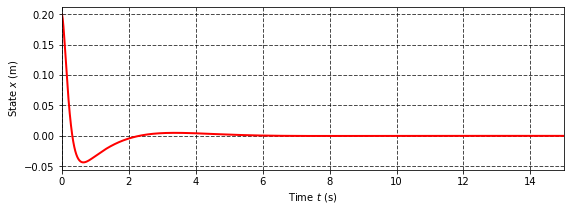

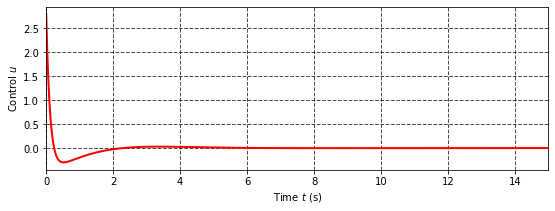

In [ ]:
import numpy as np
from scipy.integrate import odeint
from scipy.linalg import solve_continuous_are as are

def lqr(A, B, Q, R):
    # Solve the ARE
    S = are(A, B, Q, R)
    R_inv = np.linalg.inv(R)
    K = R_inv.dot((B.T).dot(S))
    Ac = A - B.dot(K)
    E = np.linalg.eigvals(Ac)
    return S, K, E


def system_ode(x, t, A, B, K):
    u = -np.dot(K,x)
    dx = np.dot(A,x) + np.dot(B,u)
    return dx


t0 = 0 # Initial time 
tf = 15 # Final time
N = int(2E3) # Numbers of points in time span
t = np.linspace(t0, tf, N) # Create time span
y_0 = 0.5
x0 = [0.2, 0, 0, 0] # Set initial state 


M, m, l, g = .4, .2, 0.2, 9.81

A = [[0, 1, 0, 0], 
     [g*(M+m)/(M*l), 0, 0, 0],
     [0,0,0,1],
     [-m*g/M, 0,0,0]]

A = np.array(A)

print(np.linalg.eigvals(A))

B = [[0], 
     [-1/(M*l)], 
     [0], 
     [1/M]]

B = np.array(B)

Q = np.diag([1,0.1,1,0.1])

R = np.diag([10])



S, K, E = lqr(A, B, Q, R)
print(K)
x_sol = odeint(system_ode, x0, t, args=(A, B, K )) # integrate system "sys_ode" from initial state $x0$
u_sol = - K.dot(x_sol.T).T
from matplotlib.pyplot import *
theta, dtheta, x, dx = x_sol[:, 0], x_sol[:, 1], x_sol[:, 2], x_sol[:, 3]


figure(figsize=(9, 3))
plot(t, theta, 'r', linewidth=2.0)
# plot(t, x, 'b', linewidth=2.0)
grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
grid(True)
xlim([t0, tf])
ylabel(r'State ${x}$ (m)')
xlabel(r'Time $t$ (s)')
show()

figure(figsize=(9, 3))
plot(t, u_sol, 'r', linewidth=2.0)
grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
grid(True)
xlim([t0, tf])
ylabel(r'Control ${u}$')
xlabel(r'Time $t$ (s)')
show()


>**HW EXERCISE**: 
Try to simulate the linear feedback on the nonlinear system with state $\mathbf{x}=[\theta, \dot{\theta}, x, \dot{x}]^T$ and dynamics given by:
\begin{equation}
\begin{cases} 
\left(M+m\right){\ddot {x}}-m L \ddot{\theta} \cos \theta +m L \dot{\theta }^{2}\sin \theta = u \\
L \ddot{\theta}- g\sin \theta =\ddot{x} \cos \theta  \\
\end{cases}
\end{equation}

### **LQR and Poles**

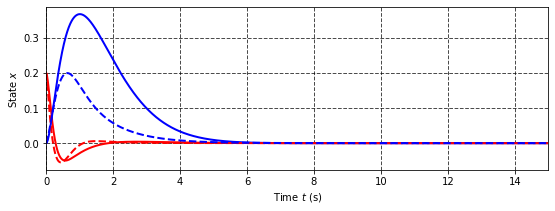

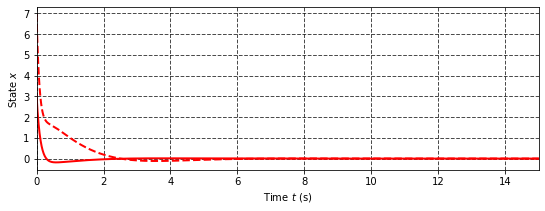

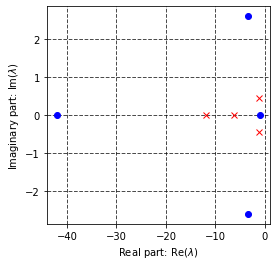

In [ ]:
import numpy as np
from scipy.signal import place_poles


Q = np.diag([1,1,1,1])
R = np.diag([1])

simulations = {'fast':{'R':R/10},'slow':{'R':R*5}}

for sim_type in simulations.keys():
  R = simulations[sim_type]['R']
  S, K, E = lqr(A, B, Q, R)
  simulations[sim_type]['eigs'] = E
  simulations[sim_type]['K'] = K
  simulations[sim_type]['x'] = odeint(system_ode, x0, t, args=(A, B, K ))
  simulations[sim_type]['u'] = - K.dot(x_sol.T).T
  

figure(figsize=(9, 3))
plot(t, simulations['slow']['x'][:,0], 'r', linewidth=2.0)
plot(t, simulations['slow']['x'][:,2], 'b', linewidth=2.0)
plot(t, simulations['fast']['x'][:,0], 'r--', linewidth=2.0)
plot(t, simulations['fast']['x'][:,2], 'b--', linewidth=2.0)
grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
grid(True)
xlim([t0, tf])
ylabel(r'State ${x}$')
xlabel(r'Time $t$ (s)')
show()

figure(figsize=(9, 3))
plot(t, simulations['slow']['u'], 'r', linewidth=2.0)
plot(t, simulations['fast']['u'], 'r--', linewidth=2.0)
grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
grid(True)
xlim([t0, tf])
ylabel(r'State ${x}$')
xlabel(r'Time $t$ (s)')
show()

figure(figsize=(4, 4))
plot(simulations['fast']['eigs'].real, simulations['fast']['eigs'].imag, 'bo', label='Fast')
plot(simulations['slow']['eigs'].real, simulations['slow']['eigs'].imag, 'rx',
         label='Slow')
grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
grid(True)
xlabel(r'Real part: ${ \operatorname{Re}(\lambda)}$')
ylabel(r'Imaginary part: ${ \operatorname{Im}(\lambda)}$')
show()



Such analysis is usually performed used wider variety of approaches and mathematical tools including:
* Graphical methods such as **phase portraits** 
* Approximations of local behavior via **linearization**
* Geometrical methods and **nonlinear transformations**
* The "testing-functions" tools, such as **describing functions** and **Lyapunov method**

While the phase portraits are great visual tool that we can use for low dimensional systems 

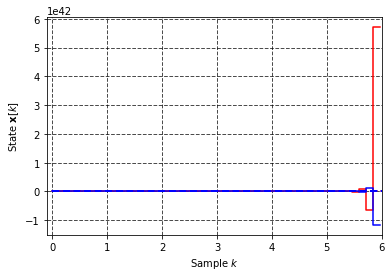

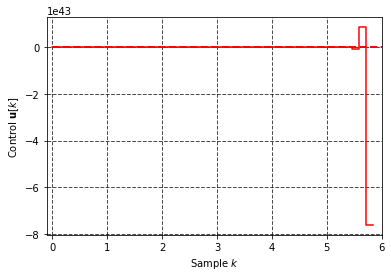

In [ ]:
from scipy.signal import cont2discrete as c2d
C = [1,0,0,0]
C = np.array(C)
D = np.array([[0]])

T = 0.13
tf = 6
N = int(tf/T)
A_d, B_d, C, D, _ = c2d((A,B,C,D), T)

K = simulations['fast']['K']
state_c = simulations['fast']['x']
u_c = simulations['fast']['u']
eigs_c = simulations['fast']['eigs']

x = np.array([0.2, 0, 0, 0])
X = x
U = []

for k in range(N):
  u = -np.dot(K,x)
  U.append(u)
  x = A_d.dot(x) + B_d.dot(u)
  X = np.vstack((X, x))



theta_c, dtheta_c, x_c, dx_c = state_c[:, 0], state_c[:, 1], state_c[:, 2], state_c[:, 3]
theta_d, dtheta_d, x_d, dx_d =X[:, 0], X[:, 1], X[:, 2], X[:, 3]

step(T*np.arange(N+1),theta_d, 'r')
step(T*np.arange(N+1),x_d, 'b')
plot(t, theta_c, 'r--', linewidth=2.0)
plot(t, x_c, 'b--', linewidth=2.0)
grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
grid(True)
ylabel(r'State $\mathbf{x}[k]$')
xlabel(r'Sample $k$')
xlim([-0.1, tf])
show()

step(T*np.arange(N),U, 'r')
plot(t, u_c, 'r--', linewidth=2.0)
grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
grid(True)
xlim([-0.1, tf])
ylabel(r'Control $\mathbf{u}[k]$')
xlabel(r'Sample $k$')
show()

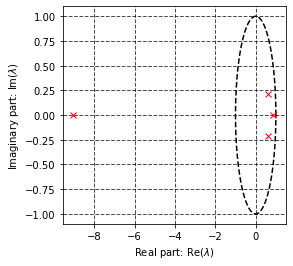

In [ ]:
eigs_d = np.linalg.eigvals(A_d - B_d.dot(K))

z = np.linspace(0, 2*np.pi, 500)

figure(figsize=(4, 4))
plot(np.cos(z), np.sin(z), 'k--')  # unit circle
# plot(eigs_c.real, eigs_c.imag, 'bo', label='Fast')
plot(eigs_d.real, eigs_d.imag, 'rx', label='Slow')
grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
grid(True)
xlabel(r'Real part: ${ \operatorname{Re}(\lambda)}$')
ylabel(r'Imaginary part: ${ \operatorname{Im}(\lambda)}$')
show()

### **Discrete Time LQR**
For a discrete-time linear system described by:

\begin{equation}
\mathbf{x}_{k+1}=\mathbf{A} \mathbf{x}_{k}+\mathbf{B}\mathbf{u}_{k}
\end{equation}
with a performance index defined as:
\begin{equation}
J_c=\sum \limits _{{k=0}}^{{\infty }}\left(\mathbf{x}_{k}^{T}\mathbf{Q}\mathbf{x}_{k}+\mathbf{u}_{k}^{T}\mathbf{R}\mathbf{u}_{k}\right)
\end{equation}

the optimal control sequence minimizing the performance index is given by:
\begin{equation}
\mathbf{u}_{k}=-\mathbf{K} \mathbf{x}_{k}
\end{equation}

where:
\begin{equation}
\mathbf{K}=(\mathbf{R}+\mathbf{B}^{T}\mathbf{S}\mathbf{B})^{{-1}}\mathbf{B}^{T}\mathbf{S}\mathbf{A}
\end{equation}

and $\mathbf{S}$ is the unique positive definite solution to the discrete time algebraic Riccati equation (DARE):

\begin{equation}
\mathbf{S}=\mathbf{A}^{T}\mathbf{S}\mathbf{A}-(\mathbf{A}^{T}\mathbf{S}\mathbf{B})\left(\mathbf{R}+\mathbf{B}^{T}\mathbf{S}\mathbf{B}\right)^{{-1}}(\mathbf{B}^{T}\mathbf{S}\mathbf{A})+\mathbf{Q}
\end{equation}

>**HW EXERCISE**: 
Implement the Discrete Time LQR

A dynamical system may be
* **SISO or MIMO**: A SISO system is single-input single-output system and a
MISO system is multiple-input multiple-output system
* **Continuous-time or discrete-time**: A continuous-time system accepts and
generates signals at all continuous times continuously.
A discrete system accepts and generates signals at discrete times.
* **Causal or non-causal**: A system is causal if its output at some time $t$
depends on inputs up to time $t$ but not after $t$. Otherwise it is non-causal.
* **Time invariant or time-varying**: A system is time-invariant if its input-output
relationship is independent of time. Otherwise it is time-varying.
* **Linear or nonlinear**: The process that we want to model may be extremely complicated with different non-linearities, it is rare that real life systems are well described by linear models along the whole operational range.

### **Plant Models**

Mathematical model is the **abstraction** of real world. While one building model of process there are a lot of simplifications may be made, and even seemingly accurate models are never perfectly describe the underlying process. **A model should be as simple as possible, and no simpler**.

<p align="center">
<img src="images/systems/robot_to_model_blank.png"" alt="drawing" width="90%" style="margin:auto"/>
</p>

Anything in the physical or biological world, whether natural or involving technology, is subject to analysis by mathematical models if it can be described in terms of mathematical expressions.




<!-- ### **Model** -->

For the purpose of control design, a suitable model of the system should be used.
Different kinds of models used in control design are:
* **Impulse response** models (time domain)
* **Transfer function** models (frequency domain)
* **State-space** models (time domain)

At present, mostly state-space models are used due to their generality, simplicity of implementation and mature mathematical apparatus that simplifies their analysis. However, impulse responce and transfer function may be usefull as well. For instance if one is interested in input output relationships, or som terminal properties of a system, impulse
response models or transfer function descriptions can be used.

However in **this course we will stick to the state space models**, since they are widely used in modern control systems.

### **State-space models**

These models are based on the concept of the **state** of the system.
The state $\mathbf{x}$ of a system is the smallest set of variables (called state variables)
such that the knowledge of these variables $\mathbf{x}_0$ at some time $t_0$ together with
the knowledge of the input $\mathbf{u}(\tau)$ for all $\tau$ from $t_0$ to $t$ completely
determines the behavior of the system for any time $t> t_0$ .

A state-space model of a system is expressed with a set of first-order
differential equations, one for each state variable.

### **Linear Systems**

Linear control theory has been predominantly concerned with the study of **linear timeinvariant** (LTI) control systems, of the form:

$$
\begin{matrix}
    \dot{\mathbf{x}} = \mathbf{A}(t) \mathbf{x} + \mathbf{B}(t) \mathbf{u}
\end{matrix}
$$


with $\mathbf{x} \in \mathbb{R}^n$ being a vector of **states**, $\mathbf{A}  \in \mathbb{R}^{n \times n}$ the **system matrix**, $\mathbf{u}\in \mathbb{R}^m$ **input** (control) vector and $\mathbf{B}   \in \mathbb{R}^{n \times m}$ is the **input matrix**. 

LTI systems have quite simple properties, such as:

* a linear system has a **unique equilibrium point** if $\mathbf{A}$ is full rank
* the equilibrium point is **stable** if all eigenvalues of $\mathbf{A}$ have negative real parts, regardless of initial conditions
* the transient response of a linear system is composed of the natural modes of the system, and the general solution can be found **analytically**
* **response** satisfies the principle of superposition.
* a sinusoidal input leads to a sinusoidal output of the **same frequency**.

**Example: Mass-Spring-Damper**

<p align="center">
<img src="images/systems/mbk_eq.png" alt="drawing" width="60%" style="margin:auto"/>
</p>

And one can formulate this system in state space as:
$$
\dot{\mathbf{x}} = \mathbf{A}\mathbf{x} =
\begin{bmatrix}
\dot{y}\\
\ddot{y}
\end{bmatrix}=
\begin{bmatrix}
0 & 1\\
-\frac{k}{m} & -\frac{b}{m}
\end{bmatrix}
 \begin{bmatrix}
y\\
\dot{y}
\end{bmatrix}
$$

### **Nonlinear Systems**

Physical systems are inherently nonlinear. Thus, all control systems are nonlinear to a
certain extent. 
Nonlinear control systems can be described by nonlinear differential equations. 

$$
\begin{matrix}
    \dot{\mathbf{x}} = \mathbf{f}(\mathbf{x},\mathbf{u},\mathbf{d}, t)
\end{matrix}
$$

where $\mathbf{f} \in \mathbb{R}^n$ is some nonlinear smooth function. 

Nonlinear systems in contrast to linear:
* in general one can't obtain analytical solution 
* a nonlinear system has a **multiple equilibrium points**
* the **stability** of these equilibriums is much harder to analyze 
* **response** does not satisfies the principle of superposition.

The form above is fairly general, however there are known special cases, like control-affine and drift-less systems which we will study a bit later.

<!-- However, if the operating range of a control system is small, and if the
involved nonlinearities are smooth, then the control system may be reasonably
approximated by a linearized system, whose dynamics is described by a set of linear
differential equations. -->

<!-- Nonlinearities can be classified as inherent (natural) and intentional (artificial).
Inherent nonlinearities are those which naturally come with the system's hardware and
motion. Examples of inherent nonlinearities include centripetal forces in rotational
motion, and Coulomb friction between contacting surfaces. Usually, such
nonlinearities have undesirable effects, and control systems have to properly
compensate for them. 
Intentional nonlinearities, on the other hand, are artificially
introduced by the designer. -->


**Example: Nonlinear Pendulum**

<p align="center">
<img src="images/systems/pend_eq.png" alt="drawing" width="60%" style="margin:auto"/>
</p>
 


<!-- Let us consider simple pendulum, with dynamics given by:

$$
(m L^2 + I) \ddot{\theta} + mgL \sin\theta + b \dot{\theta} = u
$$ -->



Given state $\mathbf{x} = [\theta, \dot{\theta}]^T$ we may formulate equation above as:

$$
\dot{\mathbf{x}} = 
\begin{bmatrix}
\dot{\theta} \\
\ddot{\theta} 
\end{bmatrix} =
\begin{bmatrix}
\dot{x}_1 \\
\dot{x}_2 
\end{bmatrix} =
\begin{bmatrix}
x_2 \\
\frac{1}{m L^2 + I}(u - mgL \sin x_1-b x_2)
\end{bmatrix} 
$$

**Example: Variable Mass Lander**

<!-- Dynamics of lunar lander given by  Tsiolkovsky-Meshchersky equation:
$$
 m\ddot{x} + mg = -k\dot{m} = -ku
$$ -->

<p align="center">
<img src="images/systems/lander_eq.png" alt="drawing" width="60%" style="margin:auto"/>
</p>



Noting that $m$ is vary we need to include it to state, thus $\mathbf{x} = [x, \dot{x}, m]^T$ and equation above is equalient to:

$$
\dot{\mathbf{x}}=
\begin{bmatrix}
\dot{x} \\
\dot{v} \\ 
\dot{m} \\
\end{bmatrix}=
\begin{bmatrix}
v \\ 
-g - \frac{k}{m} u\\ 
u \\ 
\end{bmatrix} =
\begin{bmatrix}
\dot{x}_1 \\
\dot{x}_2 \\ 
\dot{x}_3 \\
\end{bmatrix} = 
\begin{bmatrix}
x_2 \\ 
-g - \frac{k}{x_3} u\\ 
u \\ 
\end{bmatrix}
$$


### **Generilized Mechanical System**

Equation of motion for most mechanical systems may be written in following form:

$$
\mathbf{M}(\mathbf{q})\ddot{\mathbf{q}} + \mathbf{h}(\mathbf{q},\dot{\mathbf{q}}) + \mathbf{d}(\mathbf{q},\dot{\mathbf{q}},t) = \mathbf{Q} = \mathbf{B}(\mathbf{q})\mathbf{u}
$$
<!-- \mathbf{M}(\mathbf{q})\ddot{\mathbf{q}}  + \mathbf{C}(\mathbf{q},\dot{\mathbf{q}})\dot{\mathbf{q}} + \mathbf{g}(\mathbf{q}) + \mathbf{d}(\mathbf{q},\dot{\mathbf{q}},t) =  -->

where:
* $\mathbf{Q} \in \mathbb{R}^n$ - generalized forces corresponding to generilized coordinates
* $\mathbf{B} \in \mathbb{R}^{n \times m}$ - input mapping matrix that mapped actual forces to the 
* $\mathbf{d} \in \mathbb{R}^n$ - disturbances (for instance friction or external forces)
* $\mathbf{q} \in \mathbb{R}^{n}$ - vector of generilized coordinates
* $\mathbf{M} \in \mathbb{R}^{n \times n}$ - positive definite symmetric inertia matrix 
* $\mathbf{h} \in \mathbb{R}^n$ nonlinear term that describe the internal forces (coriolis and centrifugal terms)


One can easily transform the mechanical system to the state space form by defining the state $\mathbf{x} = [\mathbf{q}, \dot{\mathbf{q}}]^T$:

$$
\dot{\mathbf{x}}=
\begin{bmatrix}
\dot{\mathbf{x}}_1 \\ 
\dot{\mathbf{x}}_2
\end{bmatrix}=
\begin{bmatrix}
\dot{\mathbf{q}} \\ 
\ddot{\mathbf{q}}
\end{bmatrix}=
\begin{bmatrix}
\mathbf{x}_2 \\
\mathbf{M}^{-1}(\mathbf{x}_1) \big(\mathbf{B}(\mathbf{x}_1)\mathbf{u} - \mathbf{d}(\mathbf{x}_1, \mathbf{x}_2,t) -  \mathbf{h}(\mathbf{x}_1, \mathbf{x}_2) \big)
\end{bmatrix}
$$


**Example: Floating Rigid Body**

The model of floating rigid body described by its postion $\mathbf{p}$, linear $\mathbf{v} = \dot{\mathbf{p}}$ and angular velocity $\boldsymbol{\omega}$ subject to external force $\mathbf{f}$ and torque $\boldsymbol{\tau}$:


<p align="center">
<img src="images/systems/srb_eq.png" alt="drawing" width="60%" style="margin:auto"/>
</p>


To rewrite the following in the general form one may define following:
$$
\mathbf{M}(\mathbf{q}) = 
\begin{bmatrix}
mI & 0 \\
0 & \mathcal{I}\\
\end{bmatrix}, \quad
\mathbf{h}(\mathbf{q},\dot{\mathbf{q}}) = 
\begin{bmatrix}
mg \\
\boldsymbol{\omega} \times  \mathcal{I}\boldsymbol{\omega}\\
\end{bmatrix}, \quad \mathbf{B} = \mathbf{I}
$$

**Example: Artificial Satellite**

The artificial satellite orbiting planet may be described using Newton gravity theory as:
<!-- 
$$
\left\{\begin{matrix}
m\ddot{r}=m r\dot{\theta}^2  -G\cfrac{m M}{r^2} + u_r
\\ 
mr\ddot{\theta}=-2 m \dot{r}\dot{\theta}+ u_\theta
\end{matrix}\right.
$$ -->

<p align="center">
<img src="images/systems/satt_eq.png" alt="drawing" width="60%" style="margin:auto"/>
</p>


Given the generilized coordinates as $\mathbf{q} = [r, \theta]$ and control $\mathbf{u} = [u_r, u_\theta]^T$ one can express above in the general form:

$$
\mathbf{M}(\mathbf{q}) = 
\begin{bmatrix}
m & 0 \\
0 & mr \\
\end{bmatrix}, \quad
\mathbf{h}(\mathbf{q},\dot{\mathbf{q}}) = 
\begin{bmatrix}
-mr\dot{\theta}^2 + G\cfrac{m M}{r^2} \\
2m\dot{r}\dot{\theta}\\
\end{bmatrix}, \quad \mathbf{B} = \mathbf{I}
$$

**Example: Cart Pole**

Let us consider the cart pole described by:
<!-- $$
\begin{cases} 
\left(M+m\right){\ddot {r}}-m L \ddot{\theta} \cos \theta +m L \dot{\theta }^{2}\sin \theta = u \\
mL^2 \ddot{\theta}- mLg\sin \theta =mL\ddot{r} \cos \theta  \\
\end{cases}
$$ -->

<p align="center">
<img src="images/systems/cart_pole_eq.png" alt="drawing" width="60%" style="margin:auto"/>
</p>


Defyning the generilized coordinates as $\mathbf{q} = [r, \theta]$ and matching the terms yields:

$$
\mathbf{M}(\mathbf{q}) = 
\begin{bmatrix}
M + m & -mL \cos \theta \\
-mL \cos \theta & mL^2 \\
\end{bmatrix}, \quad
\mathbf{h}(\mathbf{q},\dot{\mathbf{q}}) = 
\begin{bmatrix}
mL\dot{\theta }^{2}\sin \theta\\
-mLg\sin \theta\\
\end{bmatrix}, \quad 
\mathbf{B} = 
\begin{bmatrix}
0 \\
1 \\
\end{bmatrix}
$$


Note that the choice of a set of state variables for a system is **not unique**. So
a state-space model for a system is also not unique. There can be **infinitely many possibilities**.

When the model is obtained from a known differential equation, you can
always select meaningful state variables. However, state variables may not
directly relate to physical variables if the model is obtained from
**identification methods**.

### **Other Models**
It should be noted that there are special cases when the equations above maybe simplified or some interesting properties may be exploited, examples are:

* Control affine systems: $\dot{\mathbf{x}} = \mathbf{f}(\mathbf{x}) + \mathbf{G}(\mathbf{x})\mathbf{u}$ 
* Drift-less systems: $\dot{\mathbf{x}} = \mathbf{G}(\mathbf{x})\mathbf{u}$ 
* Differential-Algebraic Equations: $\mathbf{F}(\dot{\mathbf{x}}, \mathbf{x},\mathbf{u}) = \boldsymbol{0}$ 
* Mechanical Systems in Regressor Form: $\mathbf{Y}(\mathbf{q}, \dot{\mathbf{q}},\ddot{\mathbf{q}})\mathbf{p} = \mathbf{B}(\mathbf{q})\mathbf{u}$
* Differential-Inclusions: $\dot{\mathbf{x}} \in \mathbf{f}(\mathbf{x},\mathbf{u},\mathbf{d}, t)$

We will consider some of these later on.

### **Discrete-Time Systems**

Some dynamical systems are described in discrete-times (which can be
counted) rather than in continuous time. e.g., system representing a bank
account whose balance is reported once everyday. 

Discrete systems are described by **difference equations**:

$$
\begin{matrix}
    \mathbf{x}_{k+1} = \mathbf{A}_k \mathbf{x}_k + \mathbf{B}_k \mathbf{u}_k\\ 
    \mathbf{x}_{k+1} = \mathbf{f}_d(\mathbf{x}_k,\mathbf{u}_k,\mathbf{d}_k, k)\\ 
\end{matrix}
$$

Some systems are inherently discrete, whereas many continuous-time
systems are modeled in discrete-time for easier analysis and design with
digital computers.

### **Discretization and Simulation**

In the field of robotics the most models are actually derived from continues differential equations while the controller is implemented in digital form (software). Thus the overall control system may be described as follows:

* Output signals from the system $\mathbf{x}(t)$ are sampled regularly at times $t_k = kT$,
$k = 0,1,2,\dots$, where $T$ is the sampling period resulting in the **state samples** $\mathbf{x}_k$.
* These samples $\mathbf{x}_k$ are fed to a **digital controller** which calculates **control input** $\mathbf{u}_k$.
* A **constant input** $\mathbf{u}_k$ is applied to real system over the sampling period using zero-order hold.

So for the purpose of control and analysis, it always useful to obtain a model of the
system in **discrete times**. Obtaining a discrete-time model is referred to as
**discretization**.

For a LTI system, we can obtain a exact discrete-time model if
the input remains constant over each sampling period. 



### **Approximated discretization** 

Exact discretization of time-varying/nonlinear systems are difficult or may not be analytically possible.

Approximate discrete-time models are widely used in practice. For a small
sampling time, $T$, we can write, for the nonlinear system $\dot{\mathbf{x}} = \mathbf{f}(\mathbf{x},\mathbf{u},\mathbf{d}, t)$:

$$
\begin{matrix}
    \mathbf{x}_{k+1} =\mathbf{x}_{k} + T\mathbf{f}\big(\mathbf{x}(kT),\mathbf{u}(kT),\mathbf{d}(kT), kT\big)\\ 
\end{matrix}
$$

And for a linear system, this becomes
$$
\mathbf{x}_{k+1} = (\mathbf{I} + T\mathbf{A}(kT))\mathbf{x}_k + T\mathbf{B}(kT)\mathbf{u}_k
$$

This is called discretization by Euler method.

**Example:**

Consider the nonlinear pendulum described by following state space representation (assuming all parameters are $1$):

$$
\dot{\mathbf{x}} = 
\begin{bmatrix}
\dot{x}_1 \\
\dot{x}_2
\end{bmatrix} =
\begin{bmatrix}
x_2 \\
u - \sin x_1 - x_2
\end{bmatrix} 
$$



The discrete model is then given by following set of difference equations:
$$
\mathbf{x}_{k+1} = 
\begin{bmatrix}
x_{1_{k+1}} \\
x_{2_{k+1}}
\end{bmatrix} =
\begin{bmatrix}
x_{1_{k}} \\
x_{2_{k}}
\end{bmatrix} 
+
T
\begin{bmatrix}
x_{2_k} \\
u - \sin x_{1_k} - x_{2_k}
\end{bmatrix} =
\begin{bmatrix}
x_{1_k} + Tx_{2_k} \\
x_{2_k} + Tu_k - T\sin x_{1_k} - Tx_{2_k}
\end{bmatrix} 
$$


### **Simulation of ODE**
While studying ODE $\dot{\mathbf{x}} = \boldsymbol{f}(\mathbf{x}, \mathbf{u}, t)$, one is often interested in its solution $\mathbf{x}(t)$ (integral curve):
$$
\mathbf{x}(t) = \int_{t_0}^{t} \boldsymbol{f}(\tau,\mathbf{x}(\tau),\mathbf{u}(\tau))d\tau,\quad \text{s.t: } \mathbf{x}(t_0) = \mathbf{x}_0
$$
The simulation is nothing but tacking the integral above.

However, in most practical situations the above cannot be solved analytically and one should consider numerical integration instead, thus ending up with descrete system:

$$
\mathbf{x}_{k+1} = \mathbf{f}_d(\mathbf{x}_k,\mathbf{u}_k,\mathbf{d}_k, k),\quad \text{s.t: } \mathbf{x}_0 = \mathbf{x}(t_0)
$$

Thus simulation is just **iteration over the descrete dynamics** starting from initial point $\mathbf{x}_0 = \mathbf{x}(t_0)$

Let us implement the simulation of nonlinear pendulum via iterating the discrete dynamics:

In [5]:
import numpy as np 

def f(state, t, control):
    u = control 
    x1, x2 = state 
    dx1 = x2 
    dx2 = u - np.sin(x1) - 0*x2
    return np.array([dx1, dx2])


In [15]:
x_0 = np.array([1,0])
T = 2E-2
tf = 10
N = int(tf/T)
X = []


# ITERATE DESCRETE DYNAMICS
x_prev = x_0
for k in range(N):
    X.append(x_prev)
    u_k = 0
    x_new = x_prev + T*f(x_prev, k*T, u_k)
    x_prev = x_new 

x_sol_simp = np.array(X)

Let us plot the result:

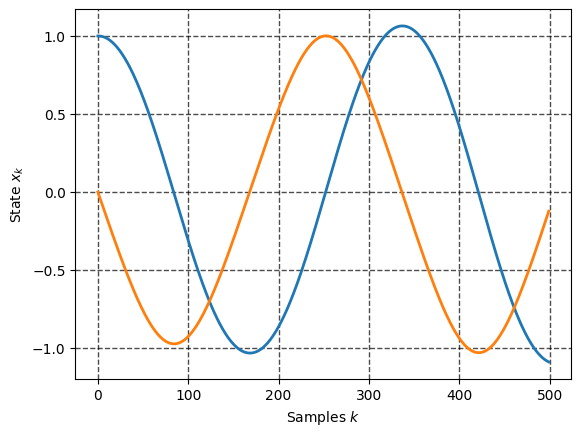

In [16]:
from matplotlib.pyplot import *

plot(x_sol_simp, linewidth=2.0)
grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
grid(True)
# xlim([t0, tf])
ylabel(r'State $x_k$')
xlabel(r'Samples $k$')
show()

The Euler method implemented above is highly dependent on the sampling period $T$, there are other suitable methods, the most widely used is the 4-th order Runge-Kutta and advanced variational integrators. However, we will not dig into the integration algorithm, instead for the purpose of simulation we will use `odeint` from the `scipy.integrate`: 

In [17]:
from scipy.integrate import odeint # import integrator routine
scale = 5

X = []
x_prev = x_0
for k in range(N):
    X.append(x_prev)
    t_k = np.linspace(k*T, (k+1)*T, scale)
    u_k = 0
    x_new = odeint(f, x_prev, t_k, args = (u_k,))
    x_prev  = x_new[-1,:] 

x_sol = np.array(X)

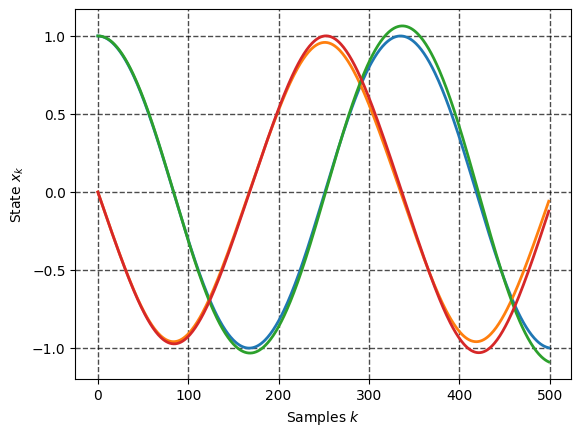

In [18]:
plot(x_sol, linewidth=2.0)
plot(x_sol_simp, linewidth=2.0)
grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
grid(True)
ylabel(r'State $x_k$')
xlabel(r'Samples $k$')
show()

### **Controller and Implementation** 

**How to make the given dynamical system display desired behavior?** this is one of the questions of concern in the field of **control** theory. One of the most widely used approaches supporting the solution of the problems above is the so-called **feedback control**

<p align="center">
    <img src="https://drive.google.com/uc?id=1E4tNt0rSwXsrGSi4U1cOk0D_Y-q8bFJ-"" alt="drawing" width="70%" style="margin:auto"/>
</p>

Let us now assume that one have designed feedback law as follows:
$$
\mathbf{u} = \boldsymbol{\varphi}(\mathbf{x})
$$




One may substitute control law and obtain the equations of the **closed loop** system:

$$
\mathbf{\dot{x}} = \mathbf{f}(\mathbf{x},\mathbf{u})  =\mathbf{f}(\mathbf{x},\boldsymbol{\varphi}(\mathbf{x})) = \mathbf{f}_c(\mathbf{x})
$$ 

now this system is unforced and may be analyzed as it is no control at all - basically we have changed the overall nature of plant - the governing dynamics.

In the **next lecture** we will learn how to **design the controller functions** and analyze **closed loop response** with different **numerical and analytical tools**, while for today we will move to the practice when we will focus on the **implementation side of the control system**.  



## **Practice 1: Architecture of The Control System, Controlled Dynamical System as Multiprocessing Software**



From point of view of control and software engineers we would like to dig more into **implementation side**. 

So far we have discussed that the purpose of **control** is to shape system in the way that it is **display desired behavior**. In paper everything is great, you just **design the controller function**, plug it to the **dynamics and analyze the resulting system**. 

But in practice in most cases the system of choice is described in continues time while controller is in descrete domain. This can be achived if simulation run considerably **faster then controller** and ideally in **parallel** to control process. Thus it is natural to run controller in the separate process or thread.


Thus the overall software structure of the control system may be roughly described as follows:

<p align="center">
<img src="images/schemes/controller_process.png" alt="drawing" width="70%" style="margin:auto"/>
</p>



Let us implement this architecture with help of `lcm` (lightweight communications and marshalling ) library:



* Install the [lcm library](https://lcm-proj.github.io/index.html) and it's [python](https://github.com/lcm-proj/lcm/tree/master/lcm-python) interface (I suggest to use virtualenv)

* Clone the [course repository](https://github.com/SimkaNed/modern_control_paradigms) and go to `code/practice_01`


* Study the `.lcm` files in `transport/messages/`, these are the structures for the **controller**, **plant** and **user** messages.


* Checkout the `pub.py` `sub.py`, this are examples of publisher and subscriber


* Implement the plant simulator, controller and user interface (`simulator.py`, `controller.py`, `commands.py`)
  * use whatever dynamical system you want, for instance the nonlinear pendulum
  * simulation can be done either with simple euler method or odeint 4-th order runge-kutta (check the code from lecture for reference)
  * use whatever controller you familiar with (i.e PD, PID), or just apply the constant/random inputs for now 
  * simulator should not be interrupted by the controller and be blocked
  * ensure that simulator is running faster then controller 


* Implement simple logger and printing routine


* **BONUS** implement online plotter and checkout the trajectories

### **Equilibriums**

One of the most natural questions ask while studying dynamical systems: Is there any special points or regions such that if system start there will remain there forever? Such regions are called invariant, and in most simple case their represented by so called singular or **equilibrium** points.

It is particular easy to find equilibriums by looking for such $\mathbf{x}_e$ that makes $\dot{\mathbf{x}}$ vanish, basicly one should just solve for roots of:
\begin{equation*}
\mathbf{f}(\mathbf{x}_e) = \mathbf{0}
\end{equation*}


Note that for linear systems one have the following:
\begin{equation*}
\mathbf{A}\mathbf{x}_e = \mathbf{0}
\end{equation*}
thus equilibriums are either trivial solution $\mathbf{x}_e = \mathbf{0}$ or nullspace $\text{Null}\{\mathbf{A}\}$ 


One may always transform the original dynamics to the new variables $\tilde{\mathbf{x}} = \mathbf{x} - \mathbf{x}_e$ such that:
\begin{equation*}
\dot{\tilde{\mathbf{x}}} = \mathbf{}\mathbf{f}(\tilde{\mathbf{x}}+\mathbf{x}_e)
\end{equation*}
we call the expression above **error** or **perturbation** dynamics

In [ ]:
from sympy import symbols, solve, sin

x = symbols(r'x')
solve(-x + x**3, x)

[-1, 0, 1]

In [ ]:
def f(x):
    return x[1], -x[1] - 3*x[0]-x[0]**2

x = symbols(r'x_1, x_2')

solve(f(x), x)

[(-3, 0), (0, 0)]

### **Nominal Motion**
In some practical problems, we are not concerned with stability around an equilibrium
point, but rather with the stability of a motion, i.e, whether a system will remain close
to its original motion trajectory if slightly perturbed away from it. 

Let $\mathbf{x}_d(t)$ be the solution of equation $\dot{\mathbf{x}}_d = \mathbf{f}(\mathbf{x}_d)$, i.e., the nominal motion trajectory,
corresponding to initial condition $\mathbf{x}_d(0) = \mathbf{x}_0$. 

Let us now perturb the initial condition to be $\mathbf{x}_d(0) = \mathbf{x}_0 + \delta\mathbf{x}_0$ and study the associated variation of the motion:
\begin{equation*}
\tilde{\mathbf{x}}(t) = \mathbf{x}(t) - \mathbf{x}_d(t)
\end{equation*}


Since both $\mathbf{x}_d(t)$ and $\mathbf{x}(t)$ are solutions, we have the following:
\begin{equation*}
\dot{\tilde{\mathbf{x}}} = \mathbf{f}(\mathbf{x}_d(t)+\tilde{\mathbf{x}}) - \mathbf{f}(\mathbf{x}_d(t)) = \mathbf{g}(\tilde{\mathbf{x}}, t)
\end{equation*}
with initial condition $\tilde{\mathbf{x}}_0 = \delta\mathbf{x}_0$

Note, that the perturbation dynamics is non-autonomous, due to the presence of the nominal trajectory $\mathbf{x}_d(t)$ on the right-hand side.

### **Concepts of Stability**

Once the equlibrium or nominal motion is given, the natural question to ask is that how system will behave nearby.
This question is directly related to so called **stability**

Various types of stability may be discussed for the solutions of differential equations or difference equations describing dynamical systems. The one practically important type is that concerning the stability of solutions near to a point of equilibrium. This may be ,analyzed by the theory of **Aleksandr Lyapunov**. 

In simple terms, if the solutions that start out near an equilibrium point $\mathbf{x}_{e}$ stay near $\mathbf{x}_{e}$ forever, then $\mathbf{x}_{e}$ is Lyapunov stable. More strongly, if $\mathbf{x}_{0}$ is Lyapunov stable and all solutions that start out near $\mathbf{x}_{e}$ converge to $\mathbf{x}_e$, then $\mathbf{x}_{e}$ is asymptotically stable. 




A strict definitions are as follows:

Equilibrium $\mathbf{x}_e$ is said to be:
*   **Lyapunov stable** if:
\begin{equation*}
\forall \epsilon>0,\exists\delta>0, \|\mathbf{x}(0) - \mathbf{x}_e\|<\delta \rightarrow \|\mathbf{x}(t) - \mathbf{x}_e\|<\epsilon, \quad \forall t
\end{equation*}
*   **Asymptotically stable** if it is Lyapunov stable and:
\begin{equation*}
\exists \delta >0, \|\mathbf{x}(0) - \mathbf{x}_e\|< \delta, \rightarrow \lim_{t\to\infty} \|\mathbf{x}(t) - \mathbf{x}_e\| = 0, \quad \forall t
\end{equation*}
*   **Exponentially stable** if it is asymptotically stable and:
\begin{equation*}
\exists \delta, \alpha, \beta >0, \|\mathbf{x}(0) - \mathbf{x}_e\|< \delta, \rightarrow  \|\mathbf{x}(t) - \mathbf{x}_e\| \leq\alpha\|\mathbf{x}(0) - \mathbf{x}_e\|^{-{\beta}t}, \quad \forall t  
\end{equation*}

Conceptually, the meanings of the above terms are the following:

*   **Lyapunov stability** of an equilibrium means that solutions starting "close enough" to the equilibrium (within a distance $\delta$  from it) remain "close enough" forever
*   **Asymptotic stability** means that solutions that start close enough not only remain close enough but also eventually converge to the equilibrium.
*  **Exponential** stability means that solutions not only converge, but in fact converge faster than or at least as fast as a particular known rate $\alpha\|\mathbf{x}(0) - \mathbf{x}_e\|^{-{\beta}t}$


### **Stability of LTI systems**
Let us first consider the linear time invariant systems with dynamics given by $\dot{\mathbf{x}} = \mathbf{A}\mathbf{x}$, as it well known the solution of such systems is given by:
$$
\mathbf{x}^*(t)=e^{\mathbf{A}t}\mathbf{x}(0)
$$

where $e^\mathbf{A}$ is matrix exponential of $\mathbf{A}$ defined as, $e^{\mathbf{A}}=\sum _{k=0}^{\infty }{1 \over k!}\mathbf{A}^{k}$.

One may show that by defining new variables $\mathbf{Q}\mathbf{z} = \mathbf{x}$ yields:
$$
\dot{\mathbf{z}} = \mathbf{\Lambda}\mathbf{z}
$$
where $\mathbf{\Lambda}$ is diagonal matrix of eigenvalues and $\mathbf{Q}$ is matrix of eigenvectors. 

The above is in fact just a system of decoupled equations:
$$
\dot{z}_i = \lambda_i z_i,\quad i = 1,2\dots,n
$$
with known solutions:
$$
z^*_i = e^{\lambda_i t} z_i(0)
$$



The solution $z_i =  e^{\lambda_i t}z_i(0)$ can be decomposed using Euler's identity:

\begin{equation}
    z_i =  e^{\lambda_i t}z_i(0) =
    e^{(\alpha_i + i \beta_i) t}z_i(0) =
    e^{\alpha_i t} 
          e^{i \beta_i t}z_i(0) = 
    e^{\alpha_i t} 
    (\cos(\beta_i t) + i \sin(\beta_i t))z_i(0)
\end{equation}

where $\lambda_i = \alpha_i + i \beta_i, \operatorname{Re}{\lambda_i} = \alpha_i, \operatorname{Im}{\lambda_i} = \beta_i$


---
Since $\| (\cos(\beta_i t) + i \sin(\beta_i t))\| =1$ thus, norm of $z_i$:


* Bounded if $\operatorname{Re}{\lambda_i} = \alpha_i = 0$, hence the system is **Lyapunov stable**. 
* Decreasing if $\operatorname{Re}{\lambda_i} = \alpha_i < 0$, hence the system is **asymptotically** and moreover **exponentially** stable. 
* Increasing if $\operatorname{Re}{\lambda_i} = \alpha_i > 0$, hence the system is **unstable**. 
---


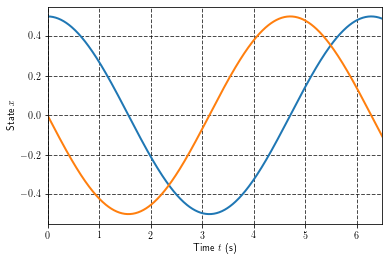

In [ ]:
def f(x, t):
    return x[1], -x[0]

x = simulate(f, [[0.5,0.0]], 
             tf=6.5, 
             show_plot=True)

### **Local Behavior and Linearization**

As one note for LTI systems stability is completely determined by the eigenvalues of $\mathbf{A}$, 
however in the nonlinear case there are no notion of eigenvalues, a one of the most straightforward ideas 
is to approximate the nonlinear system in the vicente of equilibrium point using the first term of Taylor series:
 
\begin{equation*}
\dot{\mathbf{x}}
= \mathbf{f}(\mathbf{x}_e)+ 
\frac{\partial\mathbf{f}}{\partial\mathbf{x}}\Bigr\rvert_{\mathbf{x}_e} 
(\mathbf{x} - \mathbf{x}_e)
\end{equation*}

Introducing the error $\tilde{\mathbf{x}}$ we may rewrite the equation above in linear form as follows:

\begin{equation*}
\dot{\tilde{\mathbf{x}}} = \mathbf{A}\tilde{\mathbf{x}}
\end{equation*}
where:$\mathbf{A} = \frac{\partial\mathbf{f}}{\partial\mathbf{x}}\Bigr\rvert_{\mathbf{x}_e}$ - state evaluation matrix

Thus linearization consist of three steps:
1.   Solving $\mathbf{f}(\mathbf{x}_e) = \mathbf{0}$ for equilibriums.
2.   Calculation of the system Jacobian with respect to state $\mathbf{x}$
3.   Evaluation of the resulting Jacobian in the equilibrium points $\mathbf{x}_e$

### **Stibility via Lyapunov Linearization Method**

The procedure above is known as Lyapunov linearization method and can be used to find the local stability properties of nonlinear systems 
nearby equlibrium by studying their linear aproximations as follows:

* If the linearized system is **strictly stable** (i.e, if all eigenvalues of $\mathbf{A}$ are
strictly in the left-half complex plane), then the equilibrium point is **asymptotically stable** (for the **actual nonlinear** system).
* If the linearized system is **unstable** (i.e, if at least one eigenvalue of $\mathbf{A}$ is
strictly in the right-half complex plane), then the equilibrium point is **unstable**
(for the **nonlinear system**).
* If the linearized system is **marginally stable** (i.e, all eigenvalues of $\mathbf{A}$ are in
the left-half complex plane, but **at least one of them is on the** $\text{Im}$ axis), then
one **can't conclude anything** from the linear approximation (the equilibrium
point may be stable, asymptotically stable, or unstable for the nonlinear system).


Let us demonstrate the application of Lyapunov method to study stability of equlibriums of:
\begin{equation*}
\ddot{x} = \dot{x} + 3 x + x^2
\end{equation*}

In [ ]:
from sympy import Matrix

def f(x, t):
    return x[1], -x[1] - 3*x[0]-x[0]**2


x = symbols(r'x_1, x_2')
f_sym = Matrix([f(x, 0)]).T
f_sym

Matrix([
[                  x_2],
[-x_1**2 - 3*x_1 - x_2]])

In [ ]:
equlibriums = solve(f_sym, x)
print(equlibriums)

[(-3, 0), (0, 0)]


In [ ]:
jacobian = f_sym.jacobian(x)
jacobian

Matrix([
[         0,  1],
[-2*x_1 - 3, -1]])

In [ ]:
from sympy.utilities.lambdify import lambdify
from numpy import array
from numpy.linalg import eig

jacobian_num = lambdify([x], jacobian)

for equlibrium in equlibriums:
    x_e = array(equlibrium, dtype='double')
    A = array(jacobian_num(x_e), dtype='double')
    lambdas, Q = eig(A) 
    print(f'The matrix A for equlibrium {x_e} is: \n {A} \n Eigen values:\n {lambdas} \n')

The matrix A for equlibrium [-3.  0.] is: 
 [[ 0.  1.]
 [ 3. -1.]] 
 Eigen values:
 [ 1.30277564 -2.30277564] 

The matrix A for equlibrium [0. 0.] is: 
 [[ 0.  1.]
 [-3. -1.]] 
 Eigen values:
 [-0.5+1.6583124j -0.5-1.6583124j] 



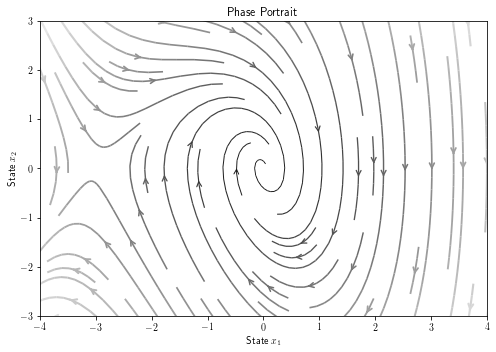

In [ ]:
phase_portrait(f,
               x_range=[4, 3],
               density=0.9)